In [1]:
import tensorflow as tf

C:\Users\dhurley\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
tf.__version__

'2.19.0'

I've commented out the tensorboard references, if you want to try with them, remove the comments and ensure tensorboard is installed on your machine

Will use the dataset from http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data to start

space separated and no headings so this is how can read it in

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv("auto-mpg.data", names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [5]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


Want to build a linear regression model, to predict MPG from HorsePower, ignoring the rest

$y_{mpg} = \alpha + \beta * x_{horsepower}$

But have to clean df

In [6]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
df = df.dropna()

Going to split the dataset into a set to FIT the model and to EVALUATE the model. Train/test sets

Could do this with sklearn

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df["Horsepower"], df["MPG"], random_state=2, train_size=0.8)

In [10]:
X_train

202     95.0
184     92.0
3      150.0
176     90.0
261    120.0
       ...  
301     70.0
22      95.0
73     130.0
15      95.0
170     78.0
Name: Horsepower, Length: 313, dtype: float64

Sometimes it is useful to Normalise the data we are working with, so that the values all fall within a consistent range (if we had multiple features). Common one being StandardScaler in sklearn which makes the data have mean 0 and stddev 1

Keras has a "layer" that we can use to build this preprocessing into the model rather than doing it manually

The `preprocessing.Normalization` layer is a clean and simple way to build that preprocessing into your model. You create the layer and `.adapt()` it to the data:

Older versions of tensorflow had this in tensorflow.keras.layers

In [13]:
from tensorflow.keras.layers import Normalization

In [14]:
X_train.values

array([ 95.,  92., 150.,  90., 120., 115., 110.,  88., 110.,  60.,  68.,
       208.,  90., 105.,  52.,  65., 150., 225., 110., 165.,  66.,  88.,
       170.,  83.,  65., 100.,  97.,  58., 110.,  95., 103.,  88.,  65.,
       112.,  88.,  97.,  63., 170., 107.,  67., 125.,  71., 110., 198.,
        96.,  74.,  96.,  78.,  65., 105., 100.,  91.,  62.,  67.,  95.,
        86.,  68., 150., 160., 139.,  52.,  88., 130., 100.,  67.,  67.,
       180.,  86.,  90., 150., 100., 158.,  65.,  75., 113.,  75., 165.,
        71., 153.,  85.,  84.,  60., 140., 170.,  67.,  90.,  95., 150.,
       149.,  75.,  72.,  83., 220.,  98.,  71., 150.,  95.,  80.,  72.,
       150., 110.,  88., 137., 153.,  95., 102., 120.,  88.,  70., 100.,
        78.,  72.,  65., 167., 180., 170., 100., 150., 116., 105.,  75.,
        48., 110.,  90., 140.,  67., 215.,  46., 105., 198.,  71.,  75.,
        86.,  68., 145., 230.,  68., 115.,  75., 150.,  75.,  67.,  83.,
        67.,  68., 150.,  67., 150.,  84.,  63., 12

In [15]:
horsepower_normalizer = Normalization(input_shape=[1,])
 #use .values to convert from pd.Series to np.array

C:\Users\dhurley\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
horsepower_normalizer.adapt(X_train.values.reshape(-1,1))

In [17]:
horsepower_normalizer

<Normalization name=normalization, built=True>

In [18]:
X_train.values

array([ 95.,  92., 150.,  90., 120., 115., 110.,  88., 110.,  60.,  68.,
       208.,  90., 105.,  52.,  65., 150., 225., 110., 165.,  66.,  88.,
       170.,  83.,  65., 100.,  97.,  58., 110.,  95., 103.,  88.,  65.,
       112.,  88.,  97.,  63., 170., 107.,  67., 125.,  71., 110., 198.,
        96.,  74.,  96.,  78.,  65., 105., 100.,  91.,  62.,  67.,  95.,
        86.,  68., 150., 160., 139.,  52.,  88., 130., 100.,  67.,  67.,
       180.,  86.,  90., 150., 100., 158.,  65.,  75., 113.,  75., 165.,
        71., 153.,  85.,  84.,  60., 140., 170.,  67.,  90.,  95., 150.,
       149.,  75.,  72.,  83., 220.,  98.,  71., 150.,  95.,  80.,  72.,
       150., 110.,  88., 137., 153.,  95., 102., 120.,  88.,  70., 100.,
        78.,  72.,  65., 167., 180., 170., 100., 150., 116., 105.,  75.,
        48., 110.,  90., 140.,  67., 215.,  46., 105., 198.,  71.,  75.,
        86.,  68., 145., 230.,  68., 115.,  75., 150.,  75.,  67.,  83.,
        67.,  68., 150.,  67., 150.,  84.,  63., 12

In [19]:
print('Normalized:', horsepower_normalizer(X_train.values).numpy())

Normalized: [[-0.24380238 -0.32220325  1.1935467  -0.37447047  0.4095381   0.27887
   0.1482019  -0.42673773  0.1482019  -1.158479   -0.9494101   2.7092965
  -0.37447047  0.0175338  -1.367548   -1.0278109   1.1935467   3.153568
   0.1482019   1.5855509  -1.0016773  -0.42673773  1.716219   -0.5574058
  -1.0278109  -0.11313429 -0.19153515 -1.2107463   0.1482019  -0.24380238
  -0.03473344 -0.42673773 -1.0278109   0.20046914 -0.42673773 -0.19153515
  -1.0800781   1.716219    0.06980104 -0.9755437   0.5402062  -0.87100923
   0.1482019   2.4479604  -0.21766876 -0.7926084  -0.21766876 -0.6880739
  -1.0278109   0.0175338  -0.11313429 -0.34833685 -1.1062118  -0.9755437
  -0.24380238 -0.47900495 -0.9494101   1.1935467   1.4548829   0.90607685
  -1.367548   -0.42673773  0.67087424 -0.11313429 -0.9755437  -0.9755437
   1.9775552  -0.47900495 -0.37447047  1.1935467  -0.11313429  1.4026155
  -1.0278109  -0.7664747   0.22660275 -0.7664747   1.5855509  -0.87100923
   1.2719475  -0.5051386  -0.5312722 

Now let's actually build the model. We will use Sequential, first layer to Normalise the data and second layer to actually do the $y=mx+c $

In [28]:
model = tf.keras.Sequential([
    horsepower_normalizer,
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [36]:
model = tf.keras.Sequential()
model.add(horsepower_normalizer)
model.add(tf.keras.layers.Dense(1))

<a href="https://keras.io/api/layers/">Keras Different Types of Layers</a>

The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

Dense is the layer type that will allow Linear Regression

Could also make the model as

In [37]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [38]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
#import tensorboard
#tensorboard.__version__

In [ ]:
#%reload_ext tensorboard

In [ ]:
#import datetime

In [ ]:
#logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
history = model.fit(
    X_train, y_train,
    epochs=40,
    verbose=1#,
    # suppress logging
    #callbacks=[tensorboard_callback]
)

Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 23.1926  
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.8750 
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.1093 
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.3632 
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.5532 
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.4154 
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.4727 
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.2168 
Epoch 9/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.4288 
Epoch 10/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.8902 
Epoch 11/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.2282 
Epoch 12/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.7533 
Epoch 13/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.9846 
Epoch 14/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0630
Epoch 15/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

In [ ]:
#logdir

In [ ]:
#%tensorboard --logdir logs/fit --host localhost --port 8088

In [34]:
history.history

{'loss': [5.050769329071045,
  4.726778984069824,
  4.46277379989624,
  4.261383533477783,
  4.159496307373047,
  4.062173843383789,
  4.001935958862305,
  3.9676766395568848,
  3.926285982131958,
  3.904235363006592,
  3.885115146636963,
  3.865586519241333,
  3.860006332397461,
  3.8537068367004395,
  3.850706100463867,
  3.849937677383423,
  3.8490734100341797,
  3.849032163619995,
  3.8509268760681152,
  3.8481593132019043,
  3.848013162612915,
  3.848907470703125,
  3.8501036167144775,
  3.8482182025909424,
  3.8483023643493652,
  3.849139451980591,
  3.8605434894561768,
  3.8488173484802246,
  3.8546676635742188,
  3.85056209564209,
  3.851940393447876,
  3.857917547225952,
  3.8503828048706055,
  3.8492586612701416,
  3.8499276638031006,
  3.8490099906921387,
  3.8481192588806152,
  3.8480873107910156,
  3.8504018783569336,
  3.8487703800201416]}

In [35]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [40]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,epoch
35,3.854176,35
36,3.849987,36
37,3.854669,37
38,3.851871,38
39,3.852705,39


In [41]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.9195 


3.6649487018585205

In [44]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    try:
        plt.plot(history.history['val_loss'], label='val_loss')
    except:
        None
    plt.ylim([0, 20])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

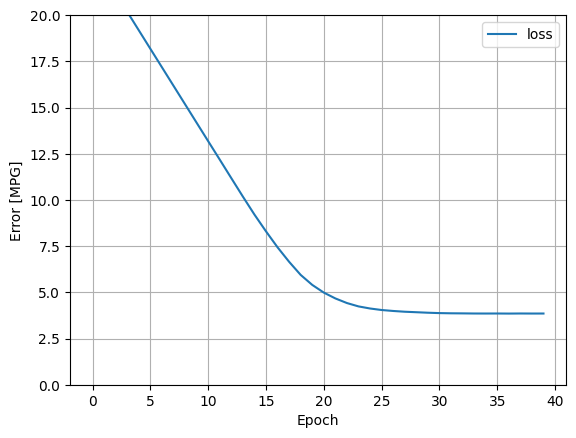

In [45]:
plot_loss(history)

In [46]:
import matplotlib.pyplot as plt

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model_sk = LinearRegression()
model_sk.fit(X_train.values.reshape(-1,1),y_train.values)

LinearRegression()

In [49]:
model_sk.coef_

array([-0.16007745])

In [50]:
model_sk.intercept_

40.31638714059319

In [51]:
print(model.predict(np.array([0])))
print(model.predict(np.array([1])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[40.815105]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[40.64817]]


In [52]:
print(model_sk.predict(np.array([0]).reshape(-1,1)))
print(model_sk.predict(np.array([1]).reshape(-1,1)))

[40.31638714]
[40.15630969]


In [53]:
def plot_horsepower(x, y):
  plt.scatter(X_train, y_train, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

In [54]:
#x

In [55]:
x = np.linspace(0.0, 250, 251)
y_pred = model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


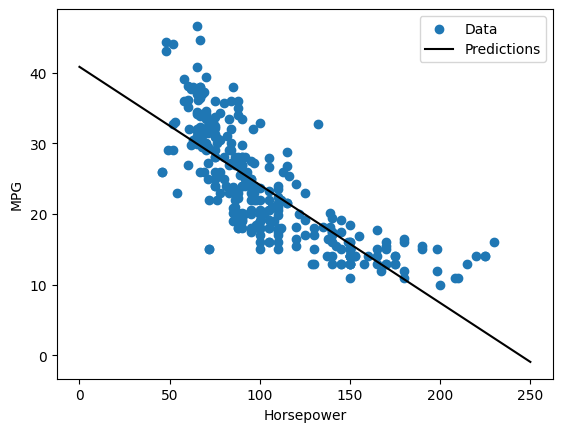

In [56]:
plot_horsepower(x,y_pred)

In [57]:
x = np.linspace(0.0, 250, 251)
y_pred = model_sk.predict(x.reshape(-1,1))

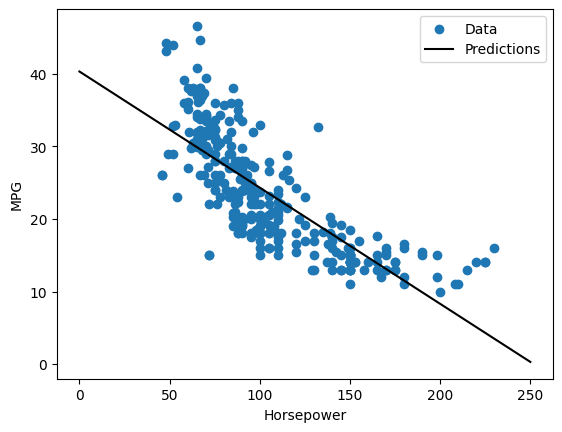

In [58]:
plot_horsepower(x,y_pred)

## Now using a Neural Network

Going to go with two hidden layers with 64 units each
The output layer will only have 1 unit (as it is a regression problem)

In [59]:
modelNN = tf.keras.Sequential([
      horsepower_normalizer,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [60]:
modelNN.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [61]:
modelNN.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [ ]:
#logdir="logsNN/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callbackNN = tf.keras.callbacks.TensorBoard(log_dir=logdir)

This time I've decided to use a validation set to evaluate the system at each epoch

Note that validation_split=0.2 takes the last 20% of the training data to be validation data, if I hadn't shuffled my data previously (using train_test_split) then I would need to now

In [62]:
%%time
historyNN = modelNN.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100
    #callbacks=[tensorboard_callbackNN]
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 23.8368 - val_loss: 23.0319
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 24.2695 - val_loss: 22.7947
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.0396 - val_loss: 22.5365
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.6962 - val_loss: 22.2256
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.9416 - val_loss: 21.8101
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.1952 - val_loss: 21.2609
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.5510 - val_loss: 20.5657
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.0494 - val_loss: 19.7328
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.7506 - val_loss: 18.7845
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 19.2799 - val_loss: 17.7243
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18.3458 - val_loss: 16.6558
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step -

In [ ]:
#%tensorboard --logdir logsNN/fit/ --host localhost --port 8088

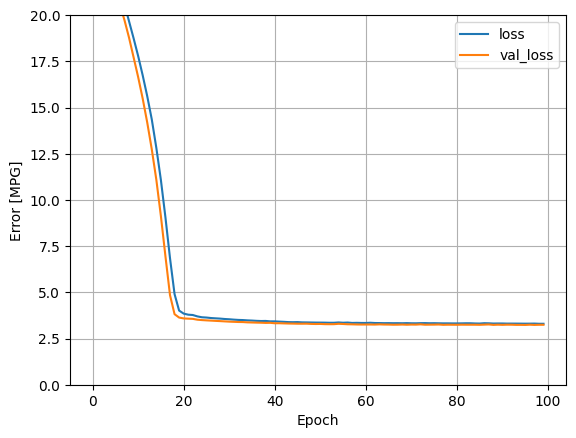

In [63]:
plot_loss(historyNN)

In [64]:
x = tf.linspace(0.0, 250, 251)
y = modelNN.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


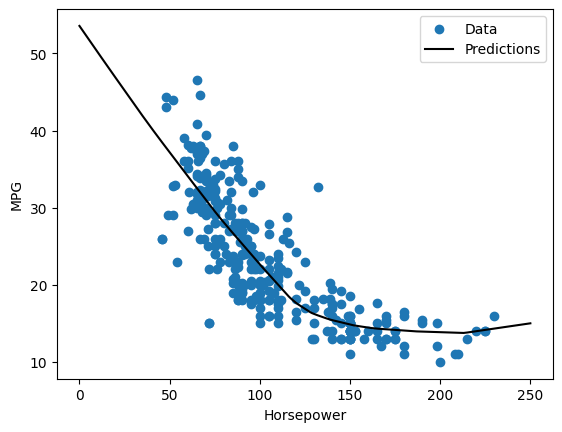

In [65]:
plot_horsepower(x,y)

Notice the different shape

In [66]:
modelNN.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.4541


3.229191780090332

It's a better score